In [210]:
from sklearn.preprocessing import OneHotEncoder
from keras import *
import pandas as pd
import numpy as np

In [211]:
alphabets = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']).reshape(-1, 1)

In [212]:
encoder = OneHotEncoder()

In [213]:
alphabets_encoded = encoder.fit_transform(alphabets)

In [214]:
alphabets_encoded

<26x26 sparse matrix of type '<class 'numpy.float64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [215]:
alphabets_encoded = alphabets_encoded.todense()

In [216]:
X_train = list()
y_train = list()

In [217]:
for i in range(0, alphabets_encoded.shape[0] - 1):
  X_train.append(np.array(alphabets_encoded[i]))
  y_train.append(np.array(alphabets_encoded[i + 1]))

In [218]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [219]:
X_train.shape

(25, 1, 26)

In [220]:
y_train.shape

(25, 1, 26)

In [253]:
model = Sequential()

In [254]:
model.add(layers.SimpleRNN(50, input_shape=(1, 26), return_sequences=True))

We need "return_sequences=True" while model have just one time step. The reason is if we set return_sequences equal to True, time step will be defined for continue of network.
As we selected "1" for time steps, our network will work like simple ANN.

"return_sequences=False
" => input shape for next layer (None, 50)

"return_sequences=True" => input shape for next layer (None, 1, 50)

As you can see, now time step value is defined...

In [255]:
model.add(layers.SimpleRNN(50, return_sequences=True))

In [256]:
model.add(layers.Dense(26, activation='softmax'))

In [257]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [258]:
model.fit(X_train, y_train, batch_size=32, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.0370
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0369
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0369
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0368
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0367
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0367
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0366
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0365
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0364
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0364
Epoch 11/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0363
Epoch 12/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0362
Epoch 13/500
1/1 [==============================] - 0s 8ms/ste

In [259]:
word = encoder.transform(np.array('x').reshape(-1 ,1))

In [260]:
word = np.array(word.todense()[0])

In [261]:
word = word.reshape((1, 1, 26))

In [262]:
word.shape

(1, 1, 26)

In [263]:
result = model.predict(word)

In [264]:
result

array([[[5.0618179e-04, 1.7830348e-03, 8.8358676e-04, 1.8152039e-03,
         1.4039816e-03, 2.4927096e-04, 2.2672464e-03, 2.5055213e-03,
         1.6674706e-04, 1.5780603e-03, 2.4310530e-03, 6.0857029e-04,
         8.2892329e-05, 6.9966358e-05, 3.1309950e-04, 1.1479527e-03,
         8.2343910e-04, 7.9015142e-04, 1.6047879e-03, 2.1059474e-04,
         1.2775477e-03, 1.7616024e-03, 1.3954166e-03, 5.6398456e-04,
         9.7263080e-01, 1.1293765e-03]]], dtype=float32)

In [265]:
arg = np.argmax(result[0])

In [266]:
encoder.inverse_transform(X_train[arg])[0]

array(['y'], dtype='<U1')

In [267]:
from keras.utils.vis_utils import plot_model

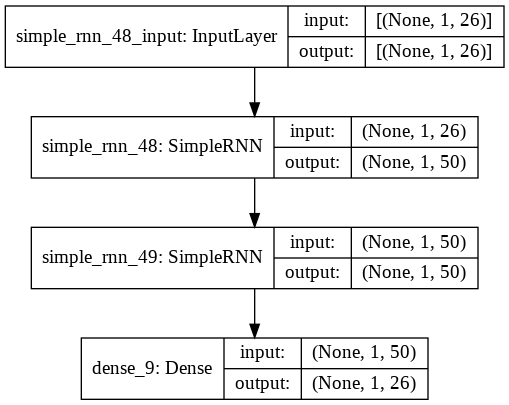

In [268]:
plot_model(model, show_shapes=True, show_layer_names=True)